In [6]:
%pylab inline
from hamutils.adif import ADIReader
import matplotlib.patches as mpatches
%env PROJ_LIB=C:/Users/albwhite/Anaconda3/Library/share/
from mpl_toolkits.basemap import Basemap
plt.rcParams["figure.figsize"]=20,20

Populating the interactive namespace from numpy and matplotlib
env: PROJ_LIB=C:/Users/albwhite/Anaconda3/Library/share/


# Define out QTH and bands we want covered

We assume all the bands in the ADIF are keys in cbands

In [2]:
# ADIF file of the QSO's. In my case exported from Log4OM
adif = r"tonlagee.adi"

# My QTH
qth = {'lat': 53.05344, 'long': -6.382647}

# Bands we're interested in and their line colour on the plot
cbands = {'40m':'blue', '20m':'red', '2m': 'green'}

# Create a dictionary of the QSOs
If the ADIF doesn't have a location we skip it.

Log4OM will try and update the details from QRZ.com, so this usually means there is no entry in QRZ.com for the callsign.

The quality of QRZ.com locations varies, it may only be accurate to the DXCC.

In [3]:
adif = open(adif, 'r', encoding="utf-8")
adi = ADIReader(adif)
calldict = {}
excludecalls = ['GW4TQD'] # No sensible location in qrz.com
for qso in adi:
    call = qso['call']
    if call in excludecalls:
        continue
    try:
        lat, lon = qso['lat'], qso['lon']
        band = qso['band']
        calldict[call] = {'lat': float(lat), 'long': float(lon), 'band': band}
    except KeyError:
        pass

# Plot all the QSOs

We go through the QSO's to contruct a suitable 'box' containing the QTHs.

If the OSQ's are all withing 5 degrees we use use the ESRI World Imagery. Larger and we use NASAs bluemarble.

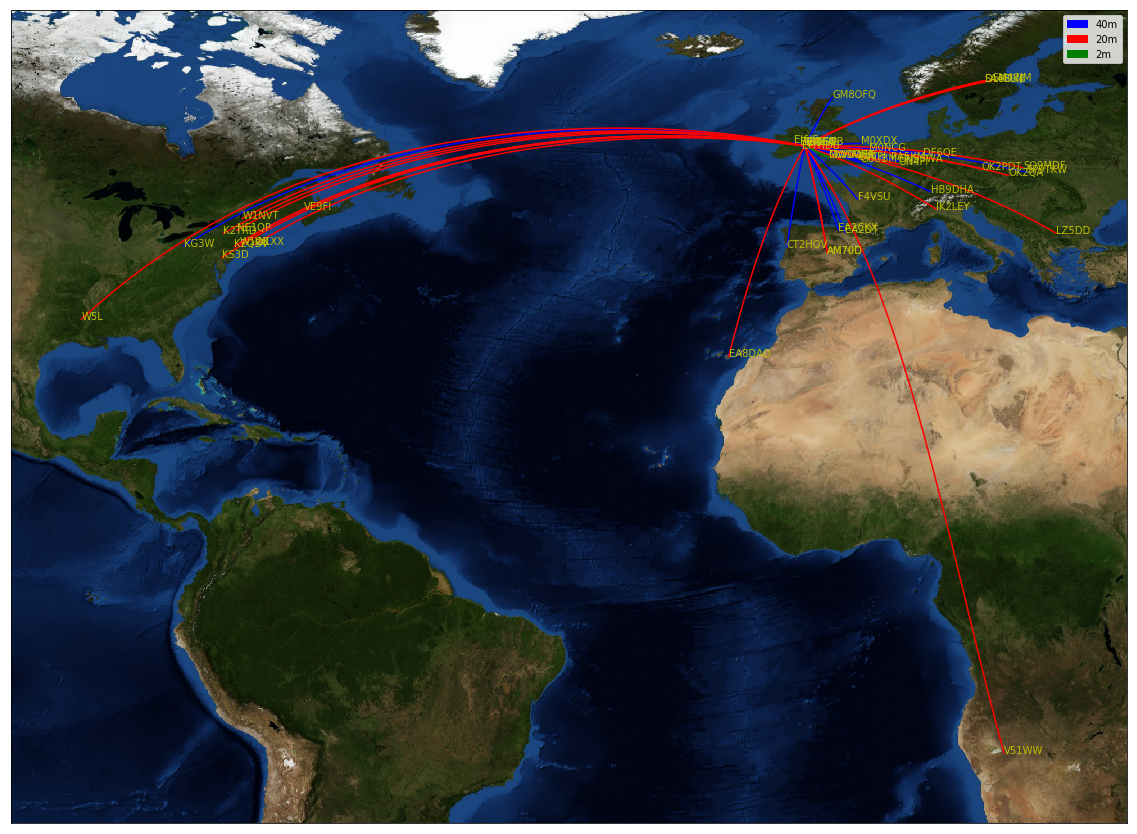

In [7]:
maxlat = max([x['lat'] for x in calldict.values()])
minlat = min([x['lat'] for x in calldict.values()])
maxlong = max([x['long'] for x in calldict.values()])
minlong = min([x['long'] for x in calldict.values()])

boundary = max(abs(maxlat) - abs(minlat), abs(maxlong) - abs(minlong)) * 0.2

map = Basemap(lon_0 = qth['long'], lat_0 = qth['lat'],
              llcrnrlon = minlong - boundary, 
              llcrnrlat = minlat - boundary, 
              urcrnrlon = maxlong + boundary, 
              urcrnrlat = maxlat + boundary)

if math.hypot(maxlat - minlat, maxlong - minlong) > 5:
    map.bluemarble()
else:
    map.arcgisimage(service = "ESRI_Imagery_World_2D", xpixels = 2000)

for call in calldict:
    x, y = map([calldict[call]['long'], qth['long']], 
               [calldict[call]['lat'], qth['lat']]) 
    map.drawgreatcircle(x[0], y[0], x[1], y[1], color=cbands[calldict[call]['band']])
    plt.annotate(call, xy=(x[0], y[0]), color='y')

plt.legend([ mpatches.Patch(color=cbands[x], label=x) for x in cbands], cbands.keys())
    
plt.show()

# Per Band plots

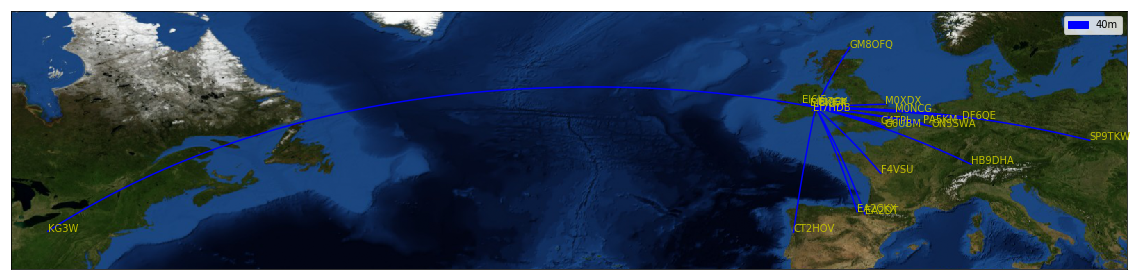

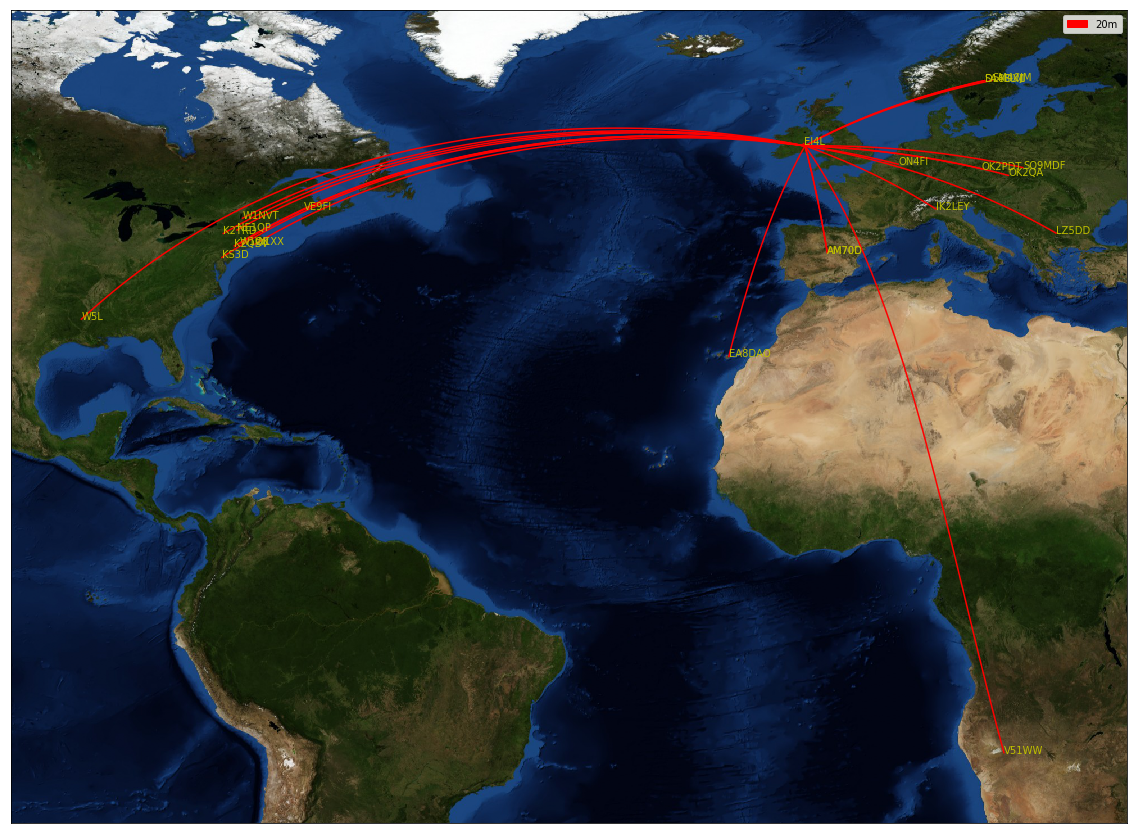

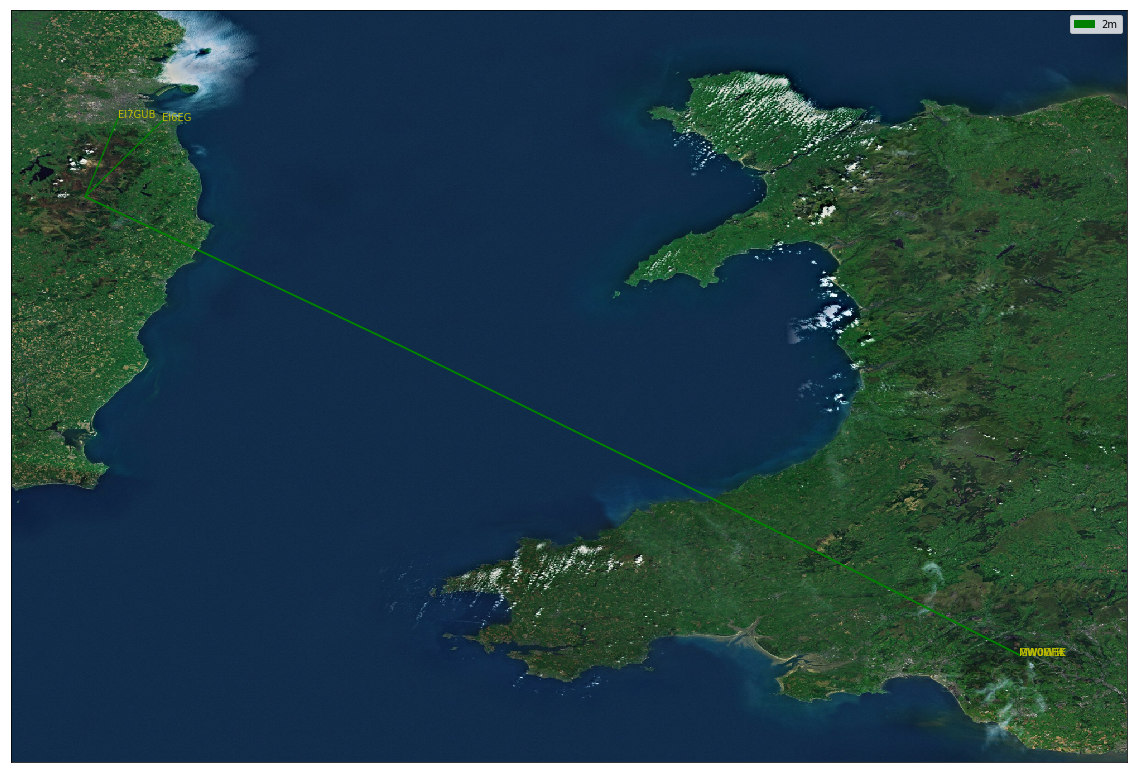

In [8]:
for band in cbands.keys():
    bcalldict = {key:val for key, val in calldict.items() if val['band'] == band}
    maxlat = max([x['lat'] for x in bcalldict.values()])
    minlat = min([x['lat'] for x in bcalldict.values()])
    maxlong = max([x['long'] for x in bcalldict.values()])
    minlong = min([x['long'] for x in bcalldict.values()])

    boundary = max(abs(maxlat) - abs(minlat), abs(maxlong) - abs(minlong)) * 0.2
    map = Basemap(lon_0 = qth['long'], lat_0 = qth['lat'],
                  llcrnrlon=minlong-boundary, 
                  llcrnrlat=minlat-boundary, 
                  urcrnrlon=maxlong+boundary, 
                  urcrnrlat=maxlat+boundary)

    if math.hypot(maxlat - minlat, maxlong - minlong) > 5:
        map.bluemarble()
    else:
        map.arcgisimage(service = "ESRI_Imagery_World_2D", xpixels = 2000)

    for call in bcalldict:
        x, y = map([bcalldict[call]['long'], qth['long']], [bcalldict[call]['lat'], qth['lat']]) 
        map.drawgreatcircle(x[0],y[0],x[1],y[1],color=cbands[bcalldict[call]['band']])
        plt.annotate(call, xy=(x[0], y[0]), color='y')

    plt.legend([mpatches.Patch(color=cbands[band], label=band)], [band])

    plt.show()